#### Code Reference
- [Python-Sars-Cov-2-Mutation-Analysis - tonygeorge1984](https://github.com/tonygeorge1984/Python-Sars-Cov-2-Mutation-Analysis)

The following code compares nucleotide sequences of the `COVID-19` strains found in different countries with the strains found in China to compare the mutation in different genes of the virus.

In [92]:
# Importing the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

The `COVID-19` strains have 11 genes in its genome sequence:
- ORF1ab: Open Reading Frame 1 for ORF1a and ORF1ab protein
- S: Spike Protein
- ORF3a: Open Reading Frame 3 for ORF3a protein
- E: Envelope Protein
- M: Membrane Protein
- ORF6: Open Reading Frame 6 for ORF6 protein
- ORF7a: Open Reading Frame 7 for ORF7a protein
- ORF7b: Open Reading Frame 7 for ORF7b protein
- ORF8: Open Reading Frame 8 for ORF8 protein
- N: Nucleocapsid Protein
- ORF10: Open Reading Frame 10 for ORF10 protein
<br><br>
We find out the mutation in each of these genes. By doing this kind of a data analysis, we can find the mutations associated with each gene. This would help the vaccine/drug development efforts to focus on those gene expression that has the least mutation.

In this code, we are analysing the gene expression of the following countries to compare it with China:
- India
- USA
- Great Britain
- South Africa
- South Korea

In [93]:
# Initialising data
genes = ['ORF1ab','S','ORF3a','E','M','ORF6','ORF7a','ORF7b','ORF8','N','ORF10']

country_names = {
    'CHN' : 'China',
    'IND' : 'India',
    'USA' : 'USA',
    'GRB' : 'Great Britain',
    'ZAF' : 'South Africa',
    'KOR' : 'South Korea' 
}

accession_no_strain = {
    'CHN': 'NC_045512.2',
    'IND':'OM915402.1',
    'USA':'MT412243.1',
    'GRB':'MT882022.1',
    'ZAF':'PP522473.1',
    'KOR':'OR432315.1'}

China = {}
India = {}
Usa = {}
Britain = {}
SAfrica = {}
Korea = {}

country_strains = {
    'CHN' : China,
    'IND' : India,
    'USA' : Usa,
    'GRB' : Britain,
    'ZAF' : SAfrica,
    'KOR' : Korea 
}

The FASTA file for each country is read and stored in the respective dictionaries.

In [94]:
# Reading the FASTA files
def sequence_from_fasta_file(file_path):  
    with open(file_path, "r") as f:
        fasta_content = f.read().split('\n')
    sequence = ""
    for line in fasta_content:
        if line.startswith(">"):
            continue
        sequence += line.strip()
    return sequence

In [95]:
# Reading the FASTA files and extracting respective gene sequences from it
def create_dict_genes(country, genes,range_values, country_code):
    sequence = sequence_from_fasta_file(f"../fasta_files/{accession_no_strain[country_code]}.fasta")
    for i in range(len(genes)):
        start_position = range_values[i][0]
        end_position = range_values[i][1]
        country[genes[i]] = sequence[start_position-1:end_position]

The different genes are stored at different positions in the genome. We used the NCBI database to pinpoint this location and used the range to extract the gene sequence from the genome.

In [96]:
# Gene Sequence range for genes. Source : NCBI

# country = [(gene1 start, gene1 end), (gene2 start, gene2 end)....]

China_range = [(266,13483),(21563,25384),(25393,26220),(26245,26472),(26523,27191),(27202,27387),(27394,27759),(27756,27887),(27894,28259),(28274,29533),(29558,29674)]
India_range = [(236,13453),(21533,25354),(25363,26190),(26215,26442),(26493,27161),(27172,27357),(27364,27729),(27726,27857),(27864,28229),(28244,29503),(29528,29644)]
Usa_range =  [(255,13472),(21552,25373),(25382,26209),(26234,26461),(26512,27180),(27191,27376), (27383, 27748), (27745,27876),(27883,28248),(28263,29522),(29547,29663)]
Britain_range =  [(264,13481),(21561,25382),(25391,26218),(26243,26470),(26521,27189),(27200,27385),(27392,27757),(27754,27885),(27892,28257),(28272,29531),(29556,29672)]
SAfrica_range =  [(216,13433),(21513,25334),(25343,26170),(26195,26422),(26473,27141),(27152,27337),(27344,27709),(27706,27837),(27844,28209),(28224,29483),(29508,29624)]
Korea_range =  [(266,13483),(21563,25384),(25393,26220),(26245,26472),(26523,27191),(27202,27387),(27394,27759),(27756,27887),(27894,28259),(28274,29533),(29558,29674)]

In [97]:
country_range = {
    'CHN' : China_range,
    'IND' : India_range,
    'USA' : Usa_range,
    'GRB' : Britain_range,
    'ZAF' : SAfrica_range,
    'KOR' : Korea_range
}

In [98]:
for country in country_strains:
    create_dict_genes(country_strains[country], genes, country_range[country], country)

The `numpy_image_dict` stores the dimensions of the plot for the respective genes. This value is used to reshape our numpy arrays to fit in our subplot and the second value is the number of `N` nucleotides added at the end of the nucleotide sequence to fit the plot dimensions. Since the number of bases in every gene in each nucleotide sequence were same, common values were chosen so that it can fit all the sequences from every country.

In [99]:
numpy_image_dict = {'ORF1ab':[(115,115),7],
                    'S':[(62,62),22],
                    'ORF3a':[(28,30),12],
                    'E':[(15,16),12], 
                    'M':[(26,27),33],
                    'ORF6':[(14,14),10],    
                    'ORF7a':[(19,20),14],
                    'ORF7b':[(12,12),12],
                    'ORF8':[(19,20),14],
                    'N':[(36,36),36],
                    'ORF10':[(11,11),4]}

In [100]:
# Adds N to the end of the nucleotide sequence to fit in the shape of the numpy array

def gene_mod(genome):
    genome_keys = list(genome.keys())
    for k in genome_keys:
        N = numpy_image_dict[k][1]
        seq = add_N(N,genome[k])
        genome[k] = seq

def add_N(n,seq):
    while n > 0:
        seq += 'N'
        n -= 1
    return seq

In [101]:
for country in country_strains:
    gene_mod(country_strains[country])

DNA class is created which stores basic `transcription` and `complement` method. Further, the method `numpfy` converts the nucleotide sequence to numpy array by replacing each base by their numpy values from the `base_codes` dictionary, which are chosen arbitrarily.

In [102]:
base_codes = {
    0 : 'A',
    255 : 'T',
    100 : 'C',
    200 : 'G',
    75 : 'N'
}

# Creating DNA class and adding DNA functions
class dna:
    def __init__(self,dna_seq):
        self.dir_3_5=dna_seq
        self.dir_5_3=self.dir_5_3_strand()
        self.mRna = None
        self.num_array = None

    def transcription(self):
        trans=''
        for nuc in self.dir_5_3:
            if nuc == 'A':
                trans += 'U'
            if nuc == 'T':
                trans += 'A'
            if nuc == 'C':
                trans += 'G'
            if nuc == 'G':
                trans += 'C'
            if nuc == 'N':
                trans += 'N'
        self.mRna = trans
        return self.mRna

    def dir_5_3_strand(self):
        dir_5_3 = ''
        for nuc in self.dir_3_5:
            if nuc == 'A':
                dir_5_3 += 'T'
            if nuc == 'T':
                dir_5_3 += 'A'
            if nuc == 'C':
                dir_5_3 += 'G'
            if nuc == 'G':
                dir_5_3 += 'C'
            if nuc == 'N':
                dir_5_3 += 'N'
        return dir_5_3

    # Converting the nucleotide sequence into an numpy array for analysis and comparison
    def numpfy(self):
        arr = ''
        for i in self.dir_3_5:
            if i == 'A':
                arr += '0 '
            if i == 'T':
                arr += '255 '
            if i == 'C':
                arr += '100 '
            if i == 'G':
                arr += '200 '
            if i == 'N':
                arr += '75 '   
        arr_np = np.fromstring(arr,dtype=np.uint8,sep=' ')        
        self.num_array = arr_np
        return self.num_array

The function `mutation_analysis()` plots the graph for the mutations in each country.<br>
It converts the nucleotide sequence of country 1 to numpy array and then it converts the nucleotide sequence of China to a numpy array.<br>
Their difference is calculated and any non-zero value in the array indicates that there is a mutation at that particular index of the graph.<br>
This data is used to plot the graphs for the:
1) Nucleotide sequence in country 1
2) Nucleotide sequence in China
3) Mutation in them 

In [103]:
# Plotting the graph for the mutation analysis
def mutation_analysis(country_name):
    print(f"Mutation in {country_names[country_name]} and China")
    print()
    country = country_strains[country_name]
    f,ax = plt.subplots(nrows=11,ncols=3,figsize=(25,30))
    gene_name = list(numpy_image_dict.keys())
    row = 0
    col = 0
    for G in gene_name:
        gene_country = dna(country[G])
        gene_country.transcription()
        numpfy_country = gene_country.numpfy()
        # Reshaping the numpy array for graphing purposes
        numpfy_country = numpfy_country.reshape(numpy_image_dict[G][0])
        ax[row][col].pcolor(numpfy_country)
        ax[row][col].set_title(G + f' Gene - {country_names[country_name]}')
        col+=1
        gene_china = dna(China[G])
        gene_china.transcription()
        numpfy_china = gene_china.numpfy()
        numpfy_china = numpfy_china.reshape(numpy_image_dict[G][0])
        ax[row][col].pcolor(numpfy_china)
        ax[row][col].set_title(G +' Gene - China')
        col+=1
        # Finding difference in both arrays to find mutation
        mut = numpfy_china - numpfy_country
        if mut.any():
            # Non-zero value in numpy array = mutation in the sequence
            mut_nec = np.nonzero(mut)
            x=mut_nec[0]
            y=mut_nec[1]
            l=0
            for i in x:
                country_base = base_codes[numpfy_country[i][y[l]]]
                ch_base = base_codes[numpfy_china[i][y[l]]]
                print("Mutated DNA Base {} in China and Base {} in {} at position {} For the Gene {}".format(ch_base,country_base, country_names[country_name], (i,y[l]),G))
                l+= 1
        ax[row][col].pcolor(mut)
        ax[row][col].set_title(G + ' Gene - Mutation')
        row+= 1
        col=0

    f.tight_layout()
    # Saving image
    image_path = '../plots/' + country_names[country_name] + '-China Mutations.jpg'
    plt.savefig(image_path)
    print()


Mutation in India and China

Mutated DNA Base C in China and Base T in India at position (0, 47) For the Gene ORF1ab
Mutated DNA Base C in China and Base T in India at position (24, 11) For the Gene ORF1ab
Mutated DNA Base C in China and Base T in India at position (43, 70) For the Gene ORF1ab
Mutated DNA Base C in China and Base A in India at position (47, 29) For the Gene ORF1ab
Mutated DNA Base C in China and Base T in India at position (52, 40) For the Gene ORF1ab
Mutated DNA Base G in China and Base T in India at position (53, 12) For the Gene ORF1ab
Mutated DNA Base G in China and Base A in India at position (82, 57) For the Gene ORF1ab
Mutated DNA Base A in China and Base G in India at position (29, 42) For the Gene S
Mutated DNA Base T in China and Base A in India at position (40, 20) For the Gene S
Mutated DNA Base T in China and Base C in India at position (48, 5) For the Gene S
Mutated DNA Base T in China and Base C in India at position (5, 19) For the Gene M
Mutated DNA Bas

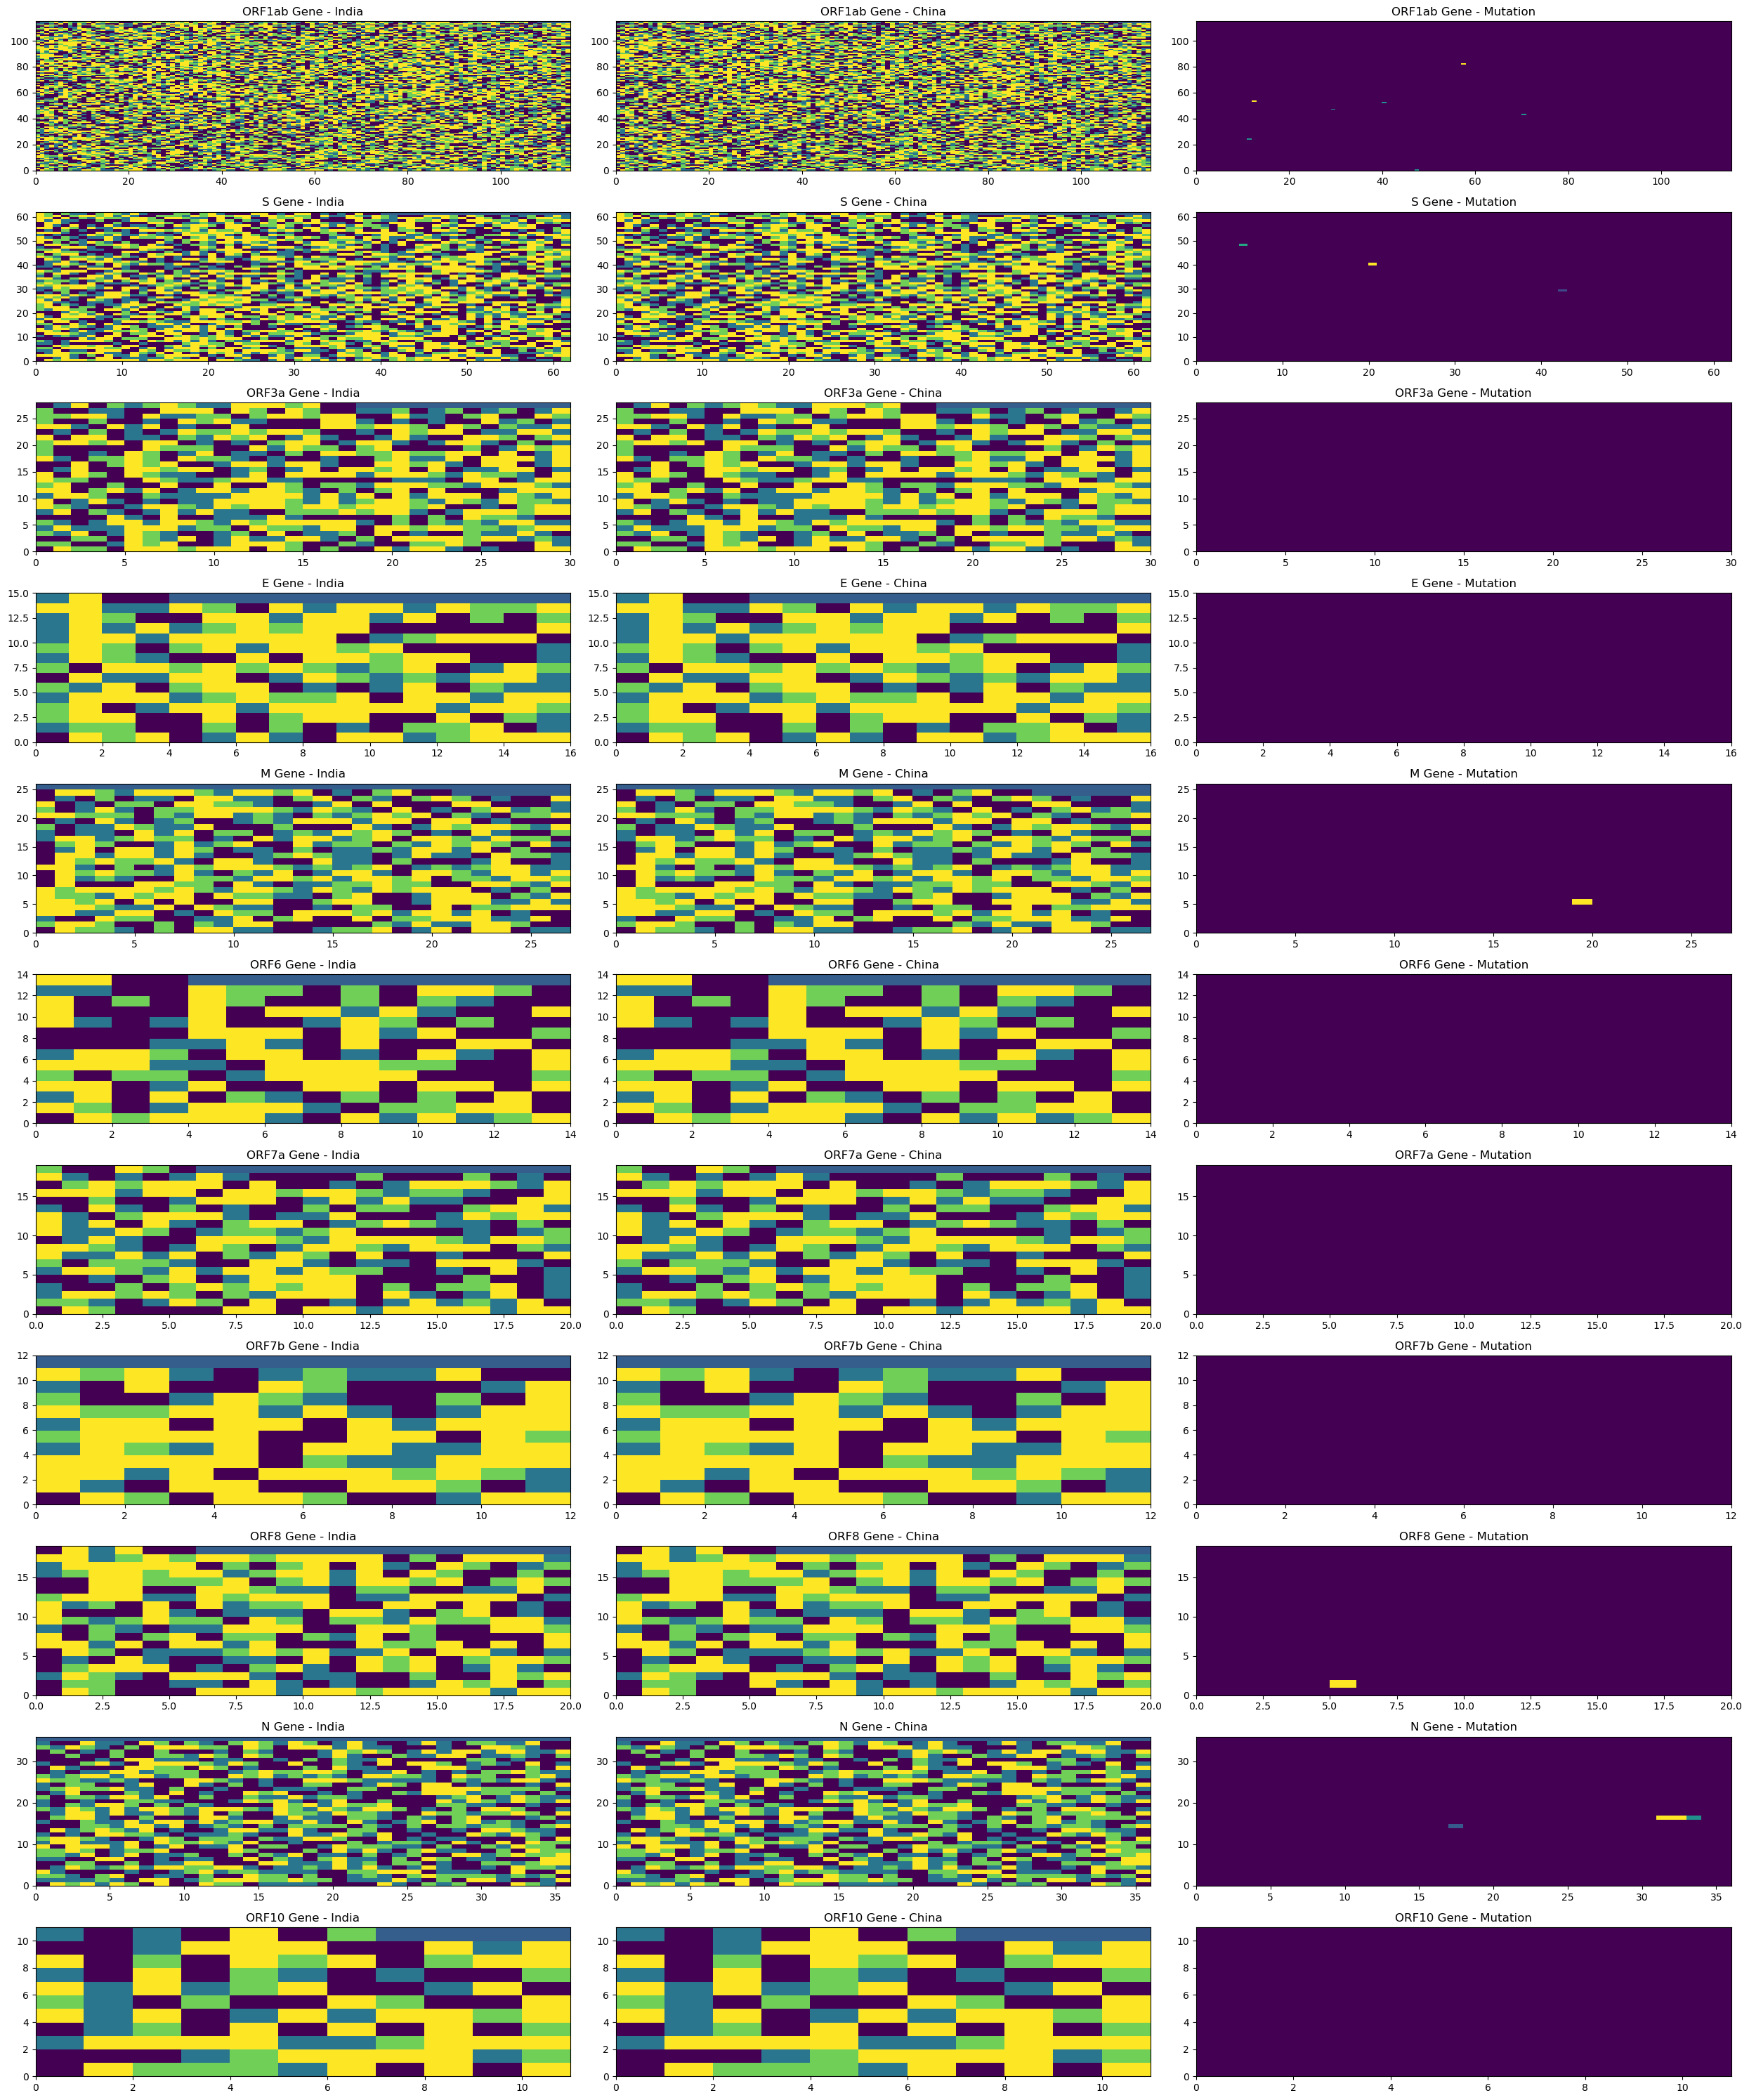

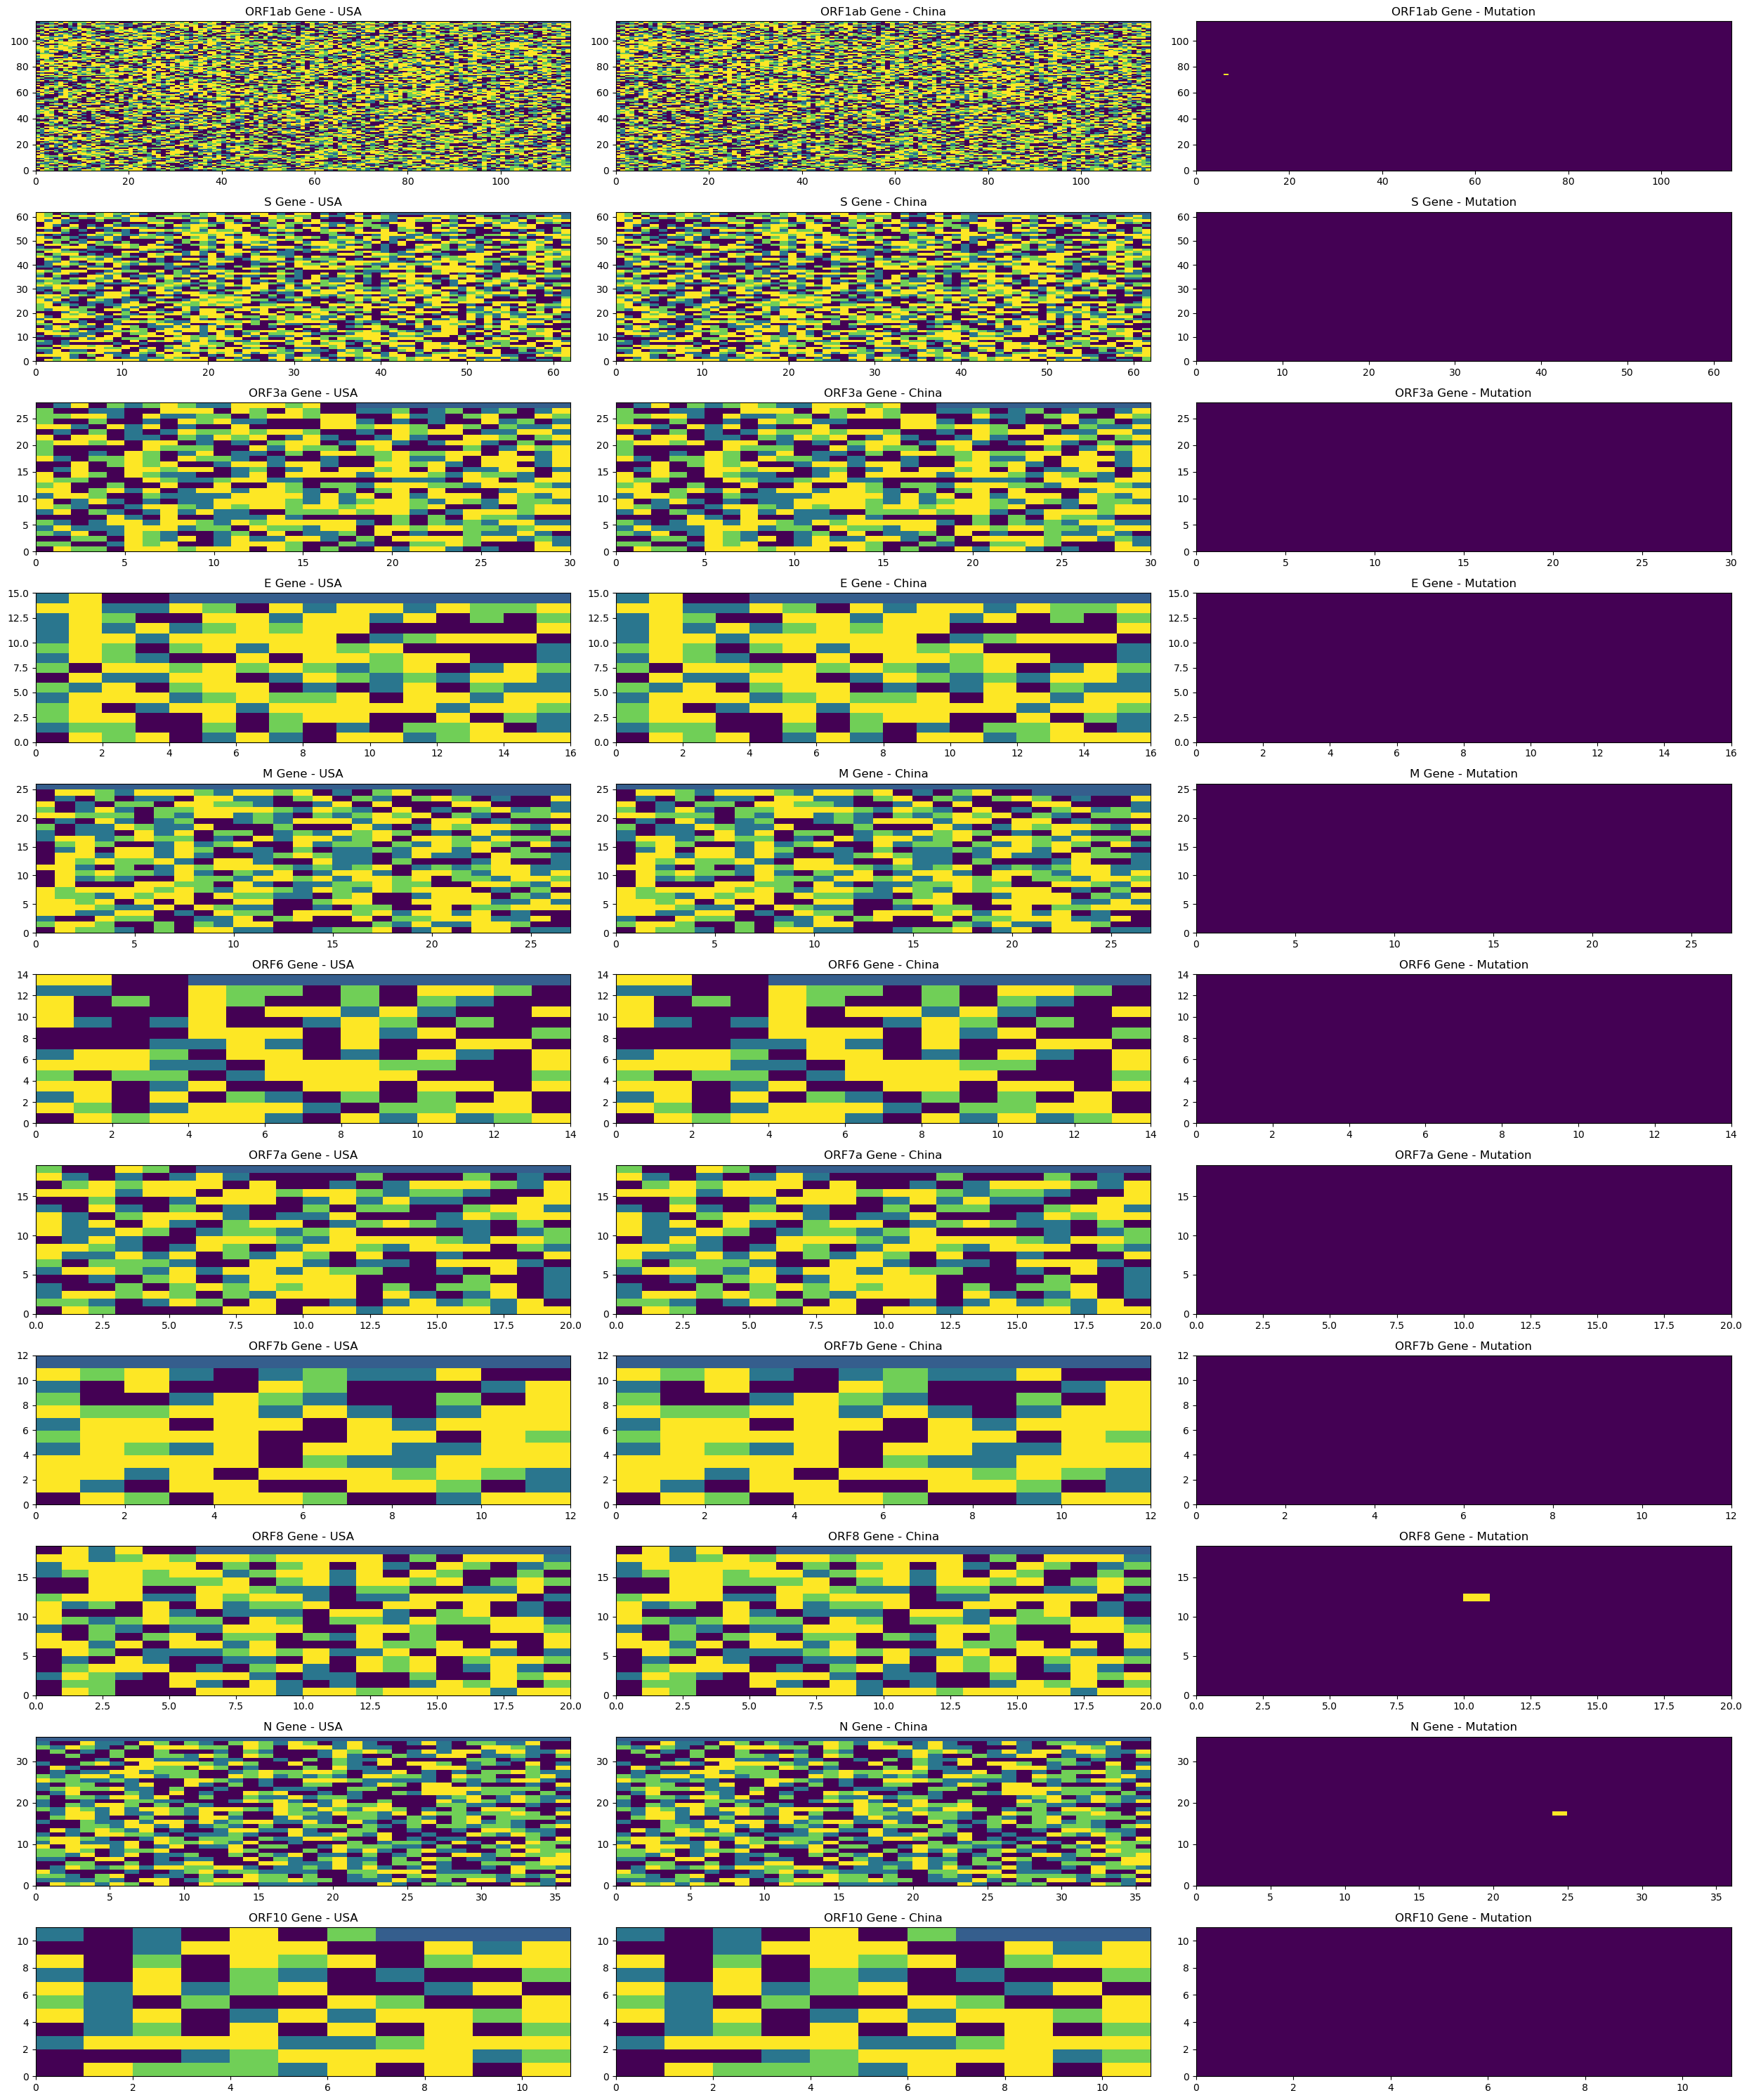

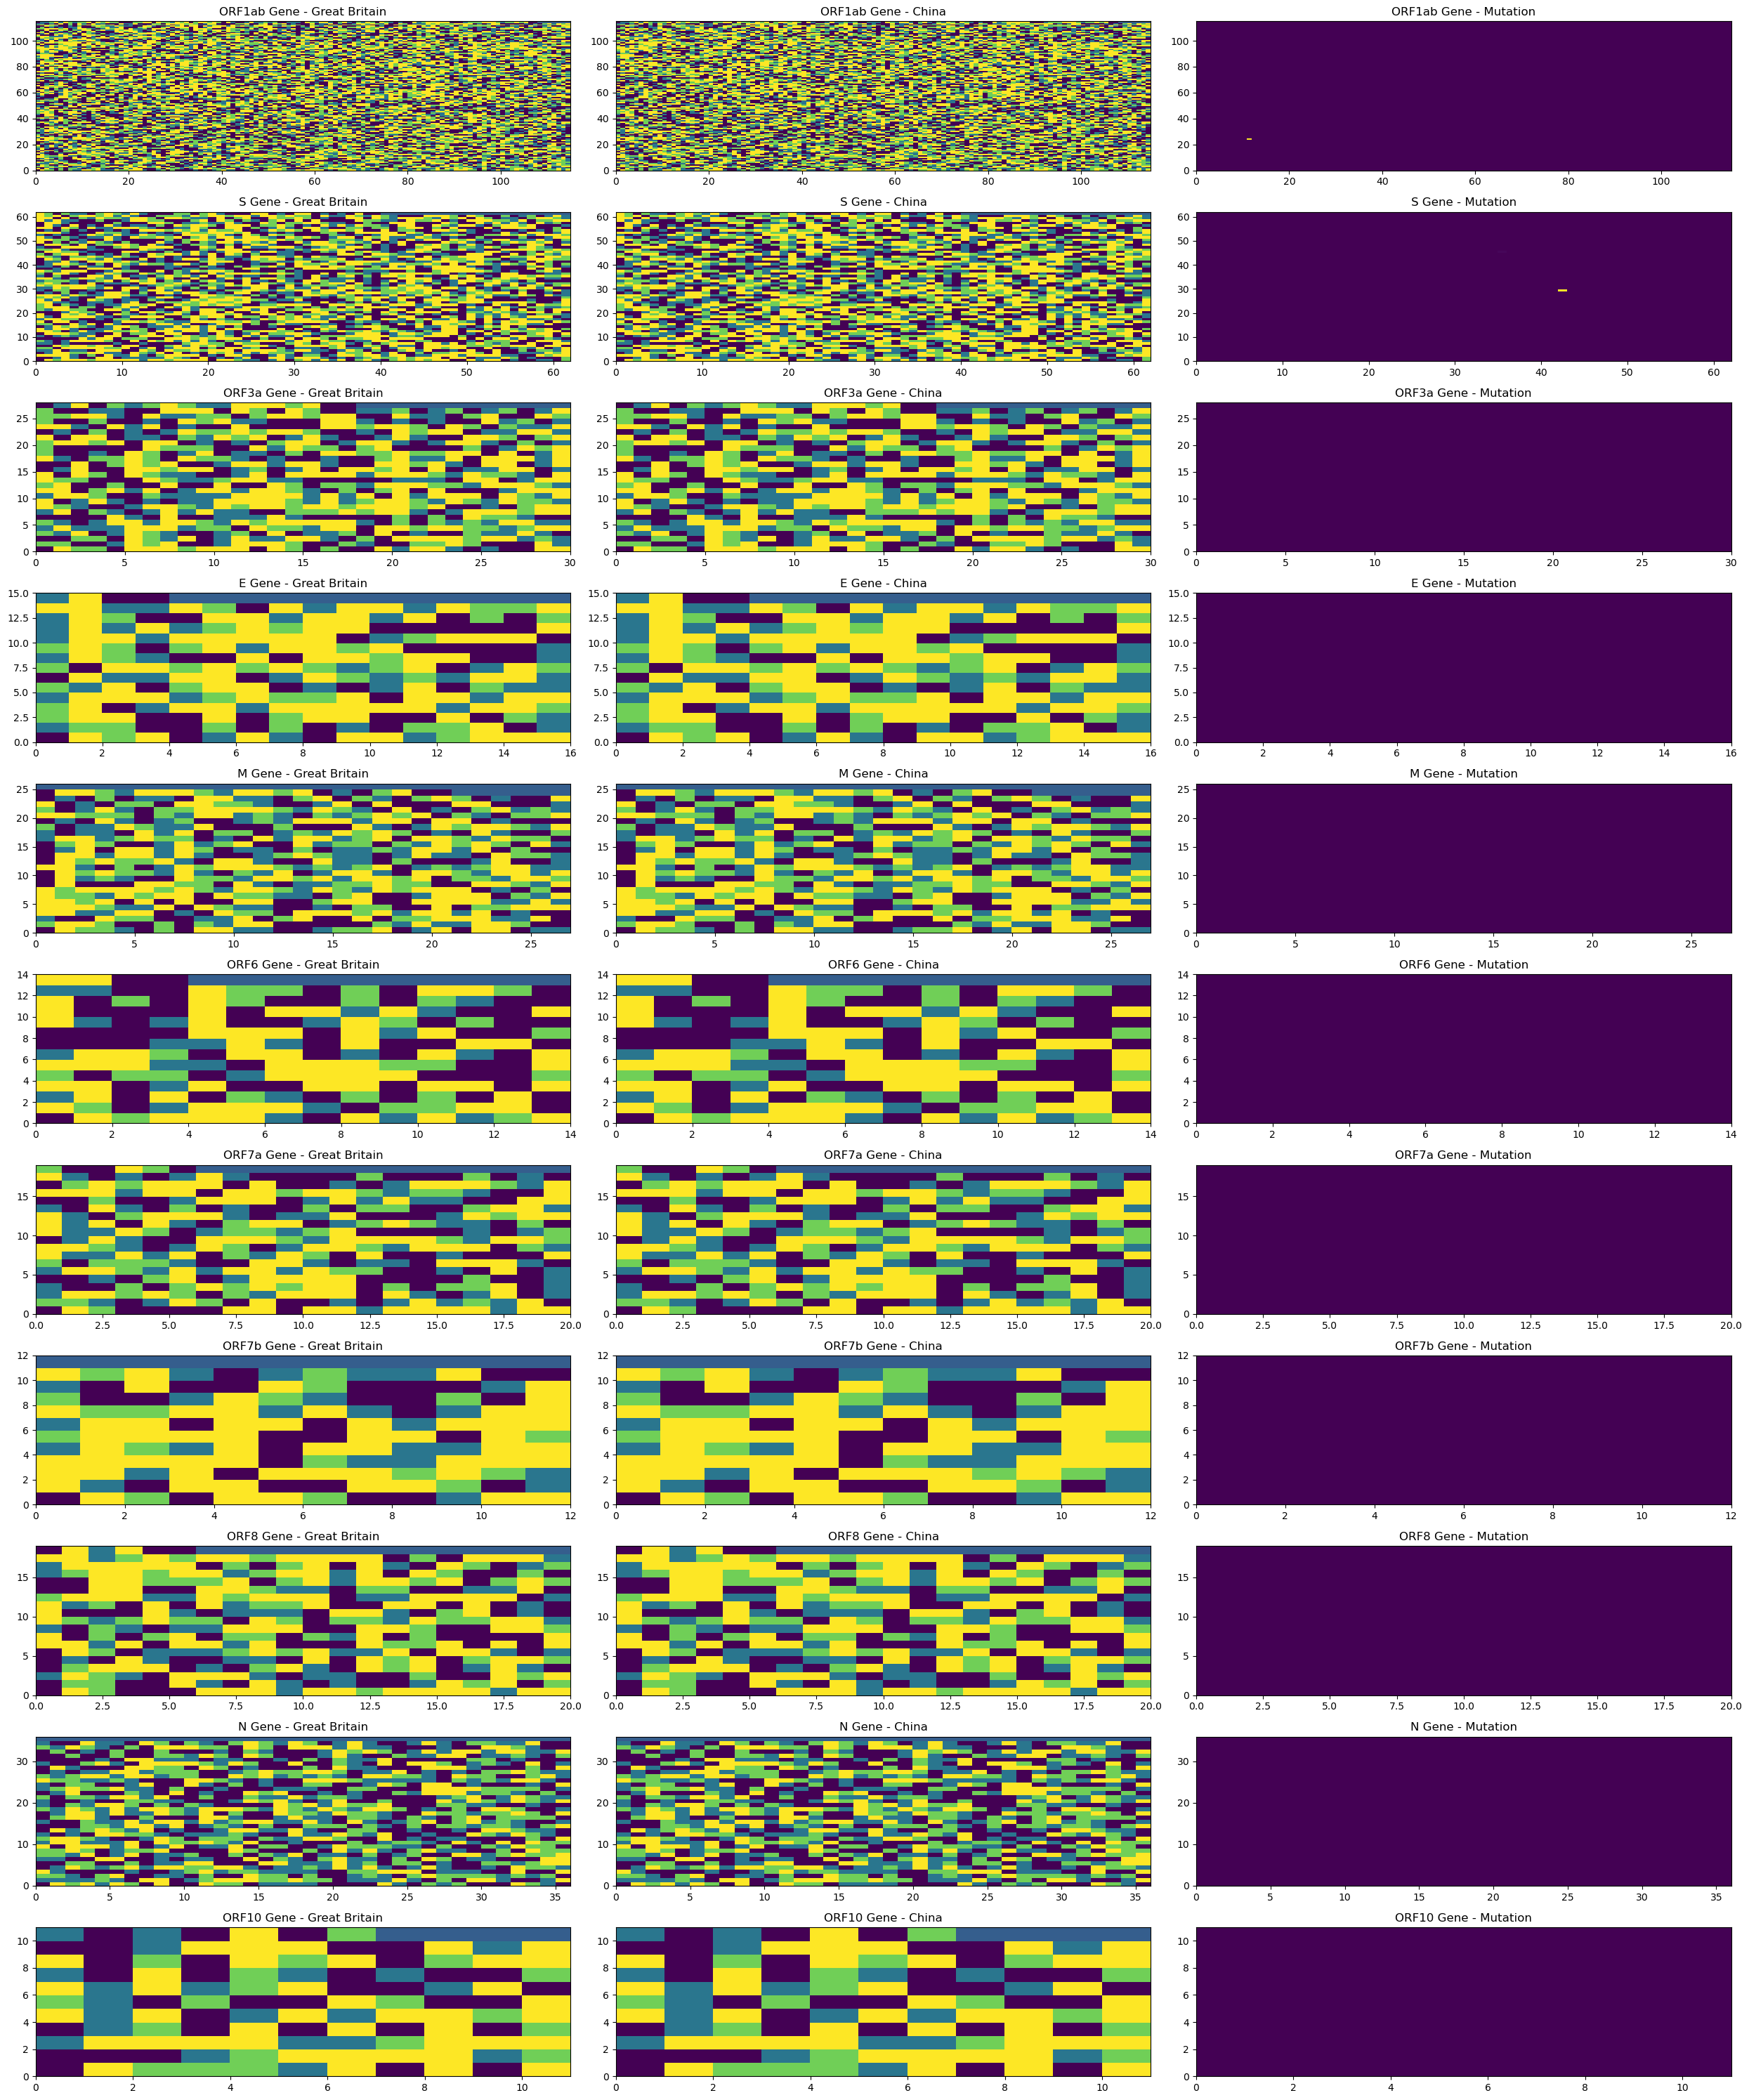

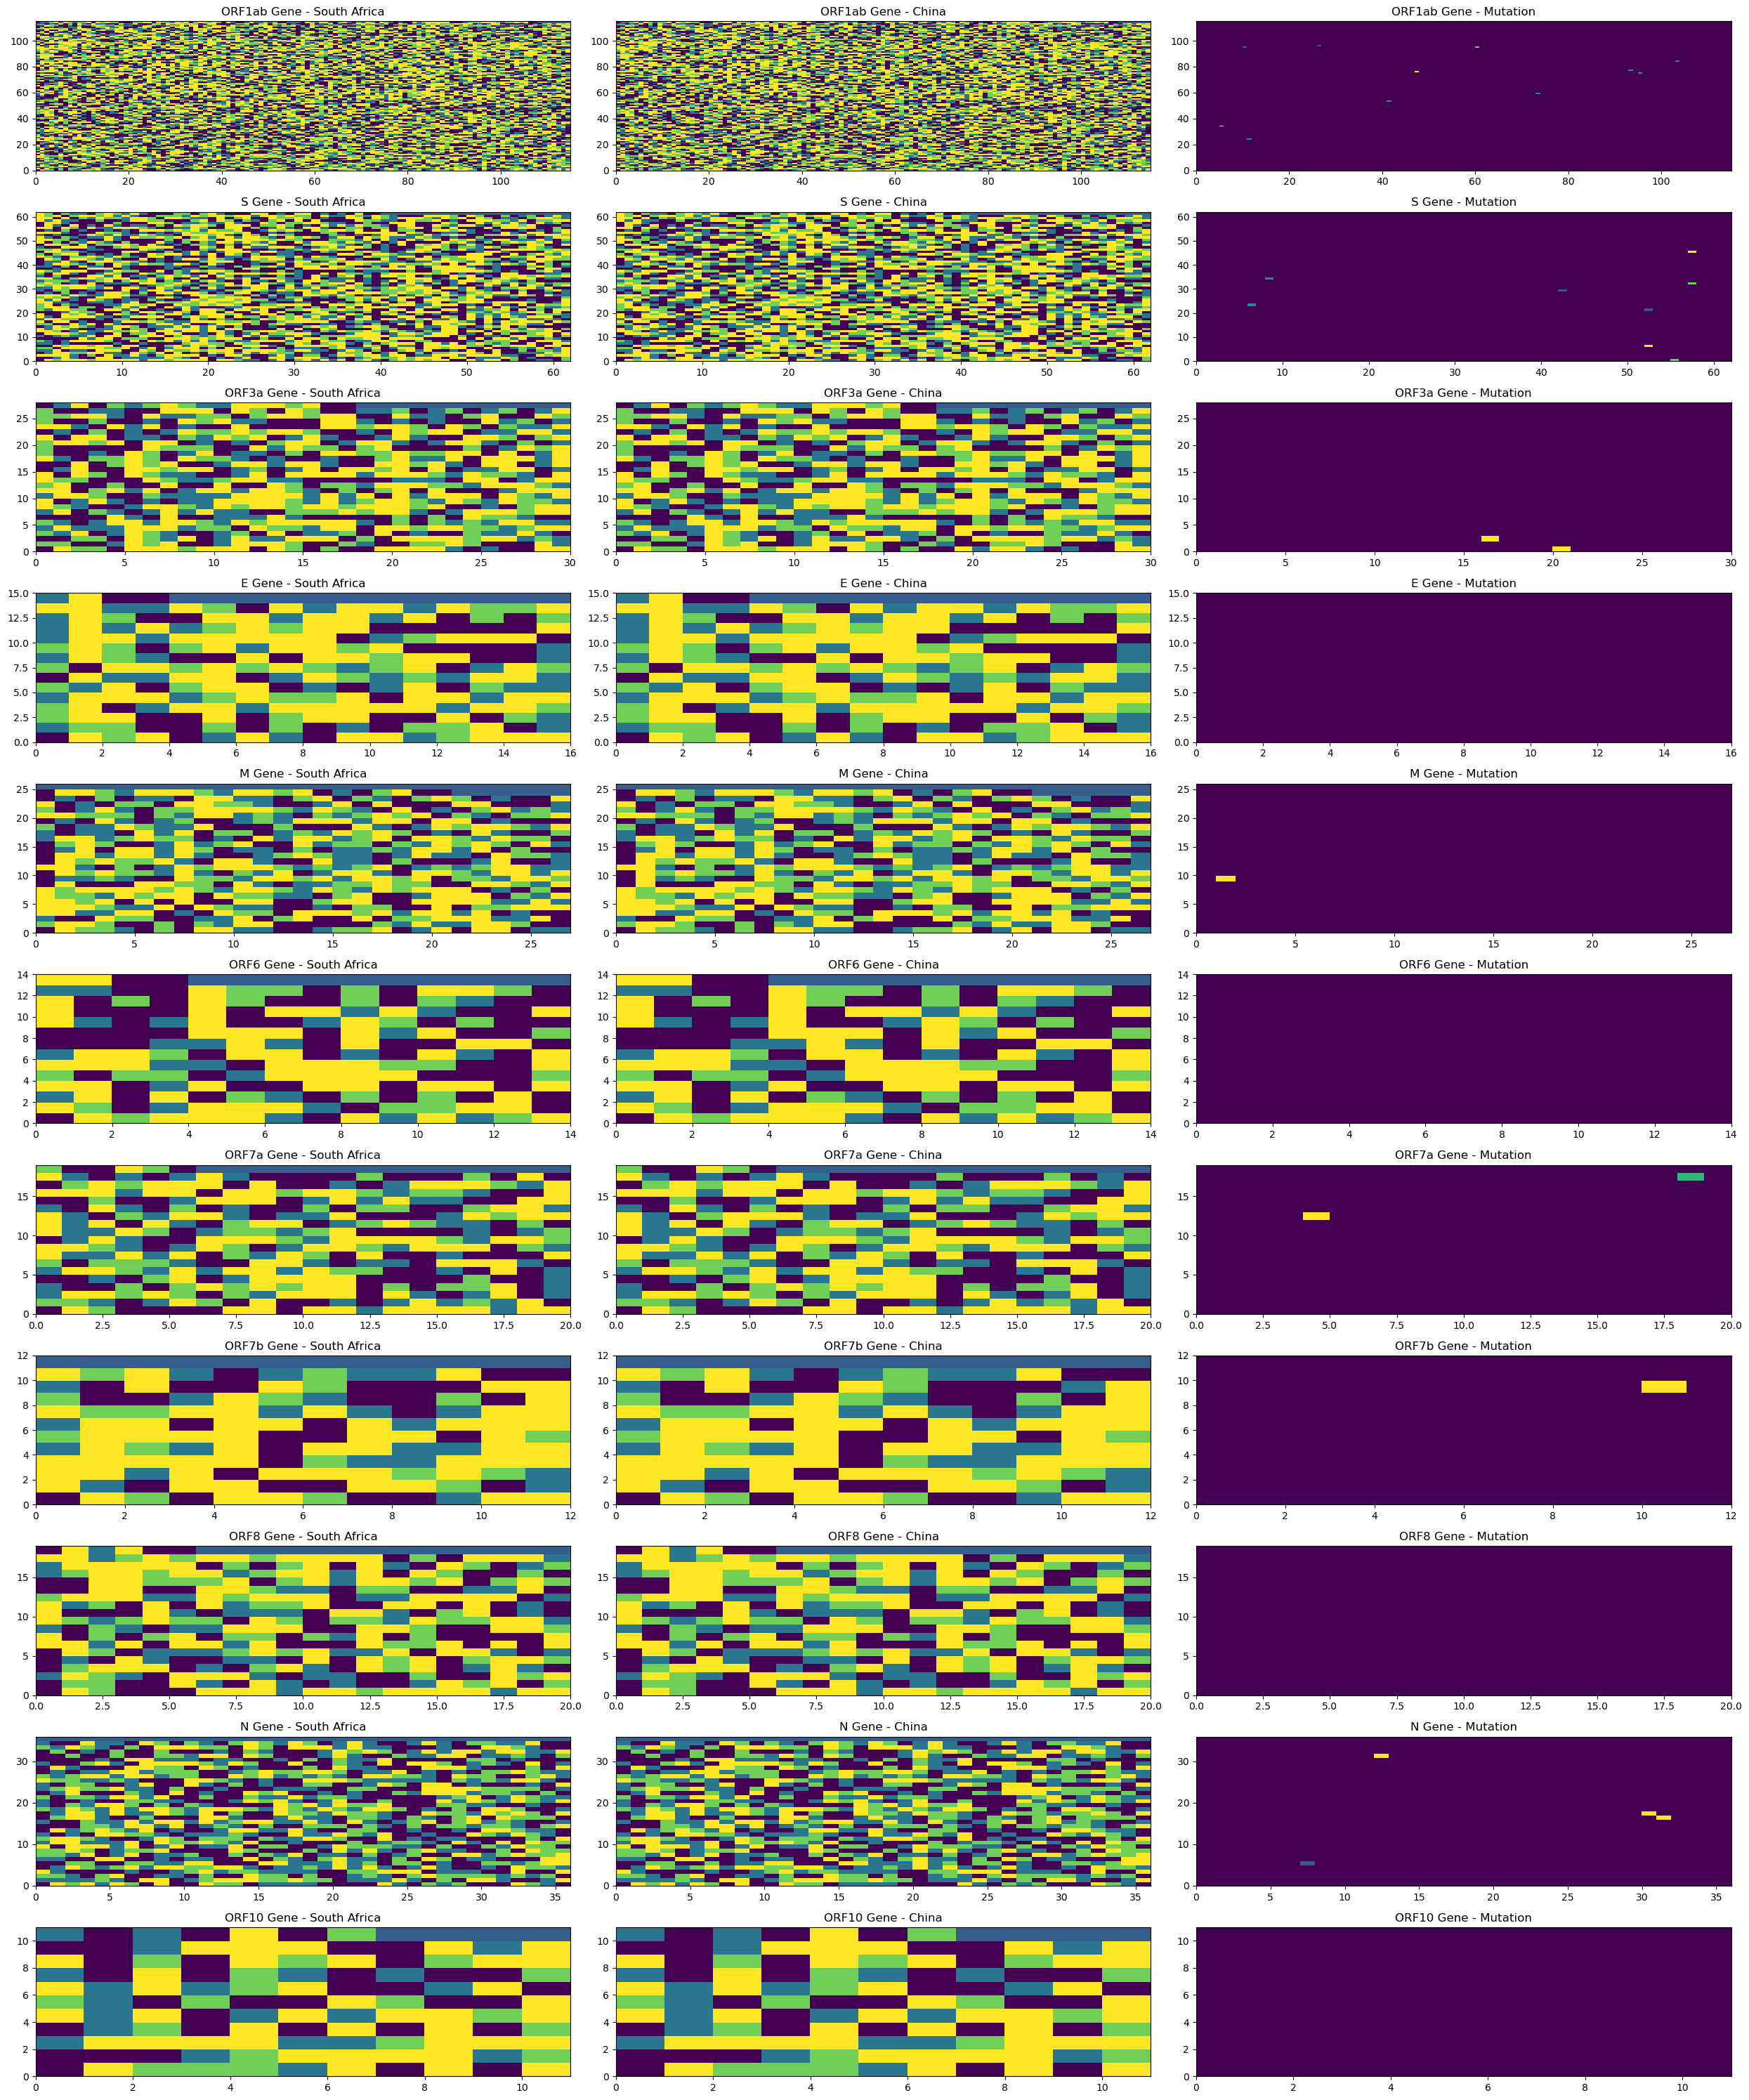

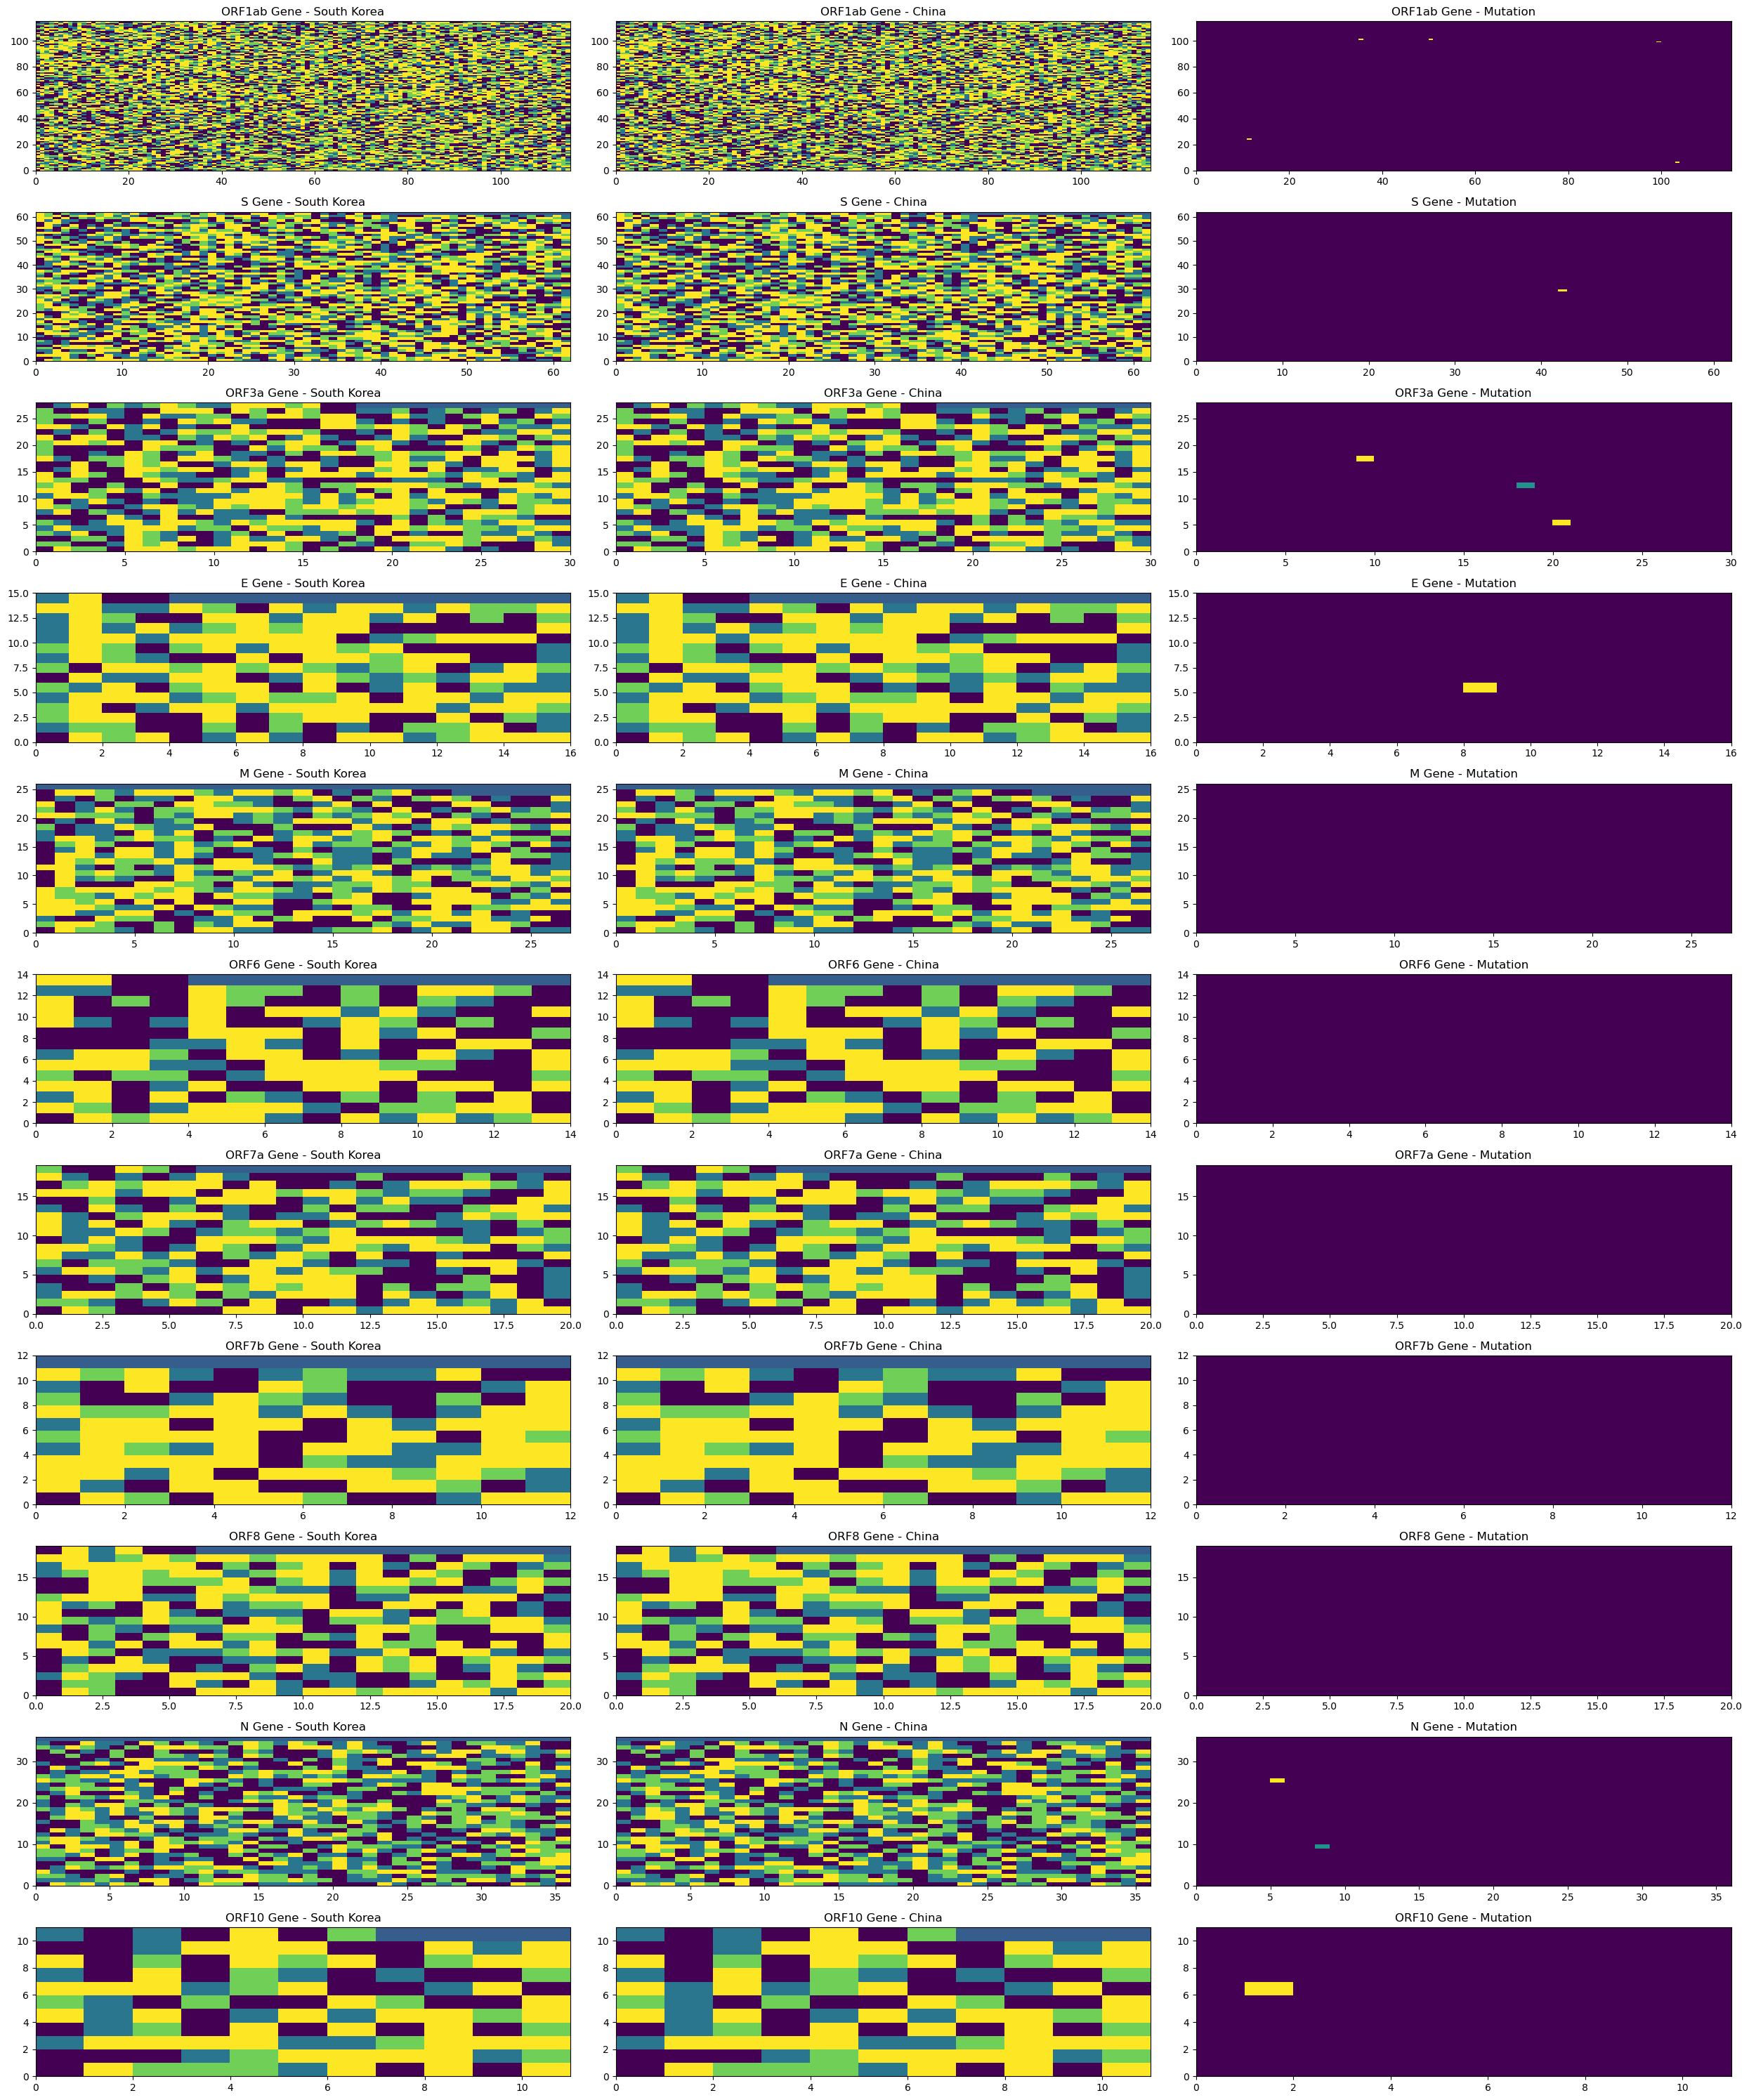

In [104]:
for country_name in country_names:
    if country_name == 'CHN':
        continue
    mutation_analysis(country_name)